In [47]:
#Import Libraries
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt

In [28]:
# Read JSON file
with open('new_bus_json.json') as f:
    data = json.load(f)
    
# Extract relevant data by Converting JSON data to DataFrame
system_data = []
for key, value in data['sensorData']['jsonData'].items():
    value['id'] = key  # Add an identifier for each data point
    system_data.append(value)

# Convert to pandas DataFrame
df = pd.DataFrame(system_data)

# Summary statistics
df.describe()

,count,humidity,pressure,temperature,oxygenSensor
count,7048.000000,7048.000000,7048.000000,7048.000000,4084.000000
mean,17.159620,40.485480,98.336019,23.700681,20.819167
std,29.646112,5.780863,5.892388,1.862144,0.101321
min,0.000000,0.000000,0.000000,0.000000,20.620000
25%,2.000000,39.580000,98.280000,22.710000,20.760000
50%,4.000000,40.840000,98.490000,23.410000,20.790000
75%,9.000000,43.960000,99.060000,25.110000,20.840000
max,91.000000,134.570000,99.820000,26.860000,21.270000


In [29]:
print("Column Data Types: ")
data_type = df.dtypes
data_type

Column Data Types: 


count             int64
humidity        float64
pressure        float64
temperature     float64
id               object
oxygenSensor    float64
dtype: object

In [30]:
null_value = df.isnull()
null_count = null_value.sum()
null_count

count              0
humidity           0
pressure           0
temperature        0
id                 0
oxygenSensor    2964
dtype: int64

In [31]:
total_null_count = null_count.sum()
total_null_count

2964

In [32]:
# Handle missing values
df.dropna(inplace=True)

In [33]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: count           0
humidity        0
pressure        0
temperature     0
id              0
oxygenSensor    0
dtype: int64


In [34]:
head = df.head(10)
head

,count,humidity,pressure,temperature,id,oxygenSensor
2964,4,41.97,98.14,22.07,-NueoL1gkM2PqLlSs80d,20.72
2965,4,41.36,98.14,22.20,-NueoM0DI7IgmpG9immZ,20.70
2966,4,41.41,98.14,22.18,-NueoN0FbRmlmFW0JL_V,20.75
2967,4,41.28,98.15,22.22,-NueoNxjgSLPRouUY6fp,20.74
2968,4,41.19,98.14,22.18,-NueoOu2aHQkjTgyOZz9,20.74
2969,4,41.64,98.15,22.20,-NueoPs1ApX76HkH7Gmf,20.71
2970,5,41.81,98.15,22.24,-NueoQoMVAUmPpz_gS91,20.74
2971,5,41.67,98.14,22.22,-NueoRkeKhxC55LQMlGX,20.74
2972,4,41.59,98.15,22.22,-NueoSuUWBXubmKgNfNp,20.74
2973,4,41.48,98.14,22.24,-NueoTrmHqGDCFQ03yY_,20.72


In [35]:
tail = df.tail(10)
tail

,count,humidity,pressure,temperature,id,oxygenSensor
7038,7,40.80,99.60,23.73,-Nv0Pw51JHOXuuB74j09,20.76
7039,7,41.23,99.61,23.73,-Nv0Px1jL5uXWxVwIqoU,20.78
7040,7,40.94,99.60,23.73,-Nv0PxzKbTCXL4INbZ76,20.77
7041,6,41.28,99.60,23.71,-Nv0PywFMFbwtSggcG8H,20.74
7042,6,40.95,99.60,23.77,-Nv0PzskQU6auAXlGLFU,20.76
7043,5,40.85,99.60,23.71,-Nv0Q-pNPJzMrIadKZRk,20.74
7044,5,41.07,99.60,23.71,-Nv0Q0lnZwZPIqzpPIFF,20.73
7045,5,40.92,99.60,23.71,-Nv0Q1iIDUka3IzUUCQj,20.74
7046,5,41.16,99.60,23.71,-Nv0Q2etjcgE3ZR6QQ_q,20.73
7047,5,40.93,99.60,23.69,-Nv0Q3bNCRZfIwvKm_vP,20.75


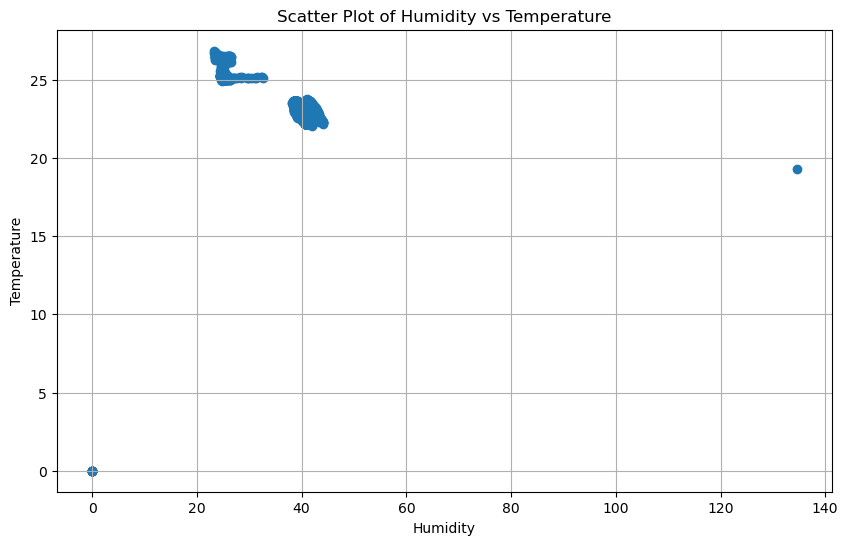

In [36]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity'], df['temperature'])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Humidity vs Temperature')
plt.grid(True)
plt.show()

In [37]:
# Model Selection
# Split data into features (X) and target variable (y)
X = df[['count']]  # Feature matrix
y = df['temperature']  # Target variable

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train the Model Using Training Data
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Performance Evaluation Using Test Data
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([23.44554253, 23.44554253, 23.34894395, 23.44554253, 22.5117563 ,
       23.46700888, 23.44554253, 23.4562757 , 23.4562757 , 23.43480935,
       23.48847523, 23.44554253, 23.44554253, 23.34894395, 23.48847523,
       23.4562757 , 23.48847523, 23.4562757 , 22.554689  , 22.5117563 ,
       23.08061458, 22.56542218, 23.4562757 , 23.29527808, 22.54395583,
       23.34894395, 23.46700888, 23.27381173, 23.43480935, 22.554689  ,
       23.46700888, 23.48847523, 22.554689  , 23.44554253, 23.48847523,
       23.47774205, 23.4562757 , 22.93035013, 23.47774205, 22.56542218,
       23.23087903, 23.46700888, 23.47774205, 22.56542218, 22.56542218,
       23.44554253, 23.46700888, 23.47774205, 22.54395583, 22.57615535,
       22.554689  , 23.47774205, 23.4562757 , 23.44554253, 23.46700888,
       23.34894395, 22.56542218, 22.56542218, 22.5117563 , 23.4562757 ,
       23.43480935, 22.57615535, 23.4562757 , 23.42407618, 22.56542218,
       23.48847523, 22.554689  , 23.44554253, 22.56542218, 22.55

In [51]:
# Calculate mean squared error and r2
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2_LR = r2_score(y_test, y_pred)
print('r2 Score:', r2_LR)

Mean Squared Error: 0.8572881286235566
r2 Score: 0.07524842245945229


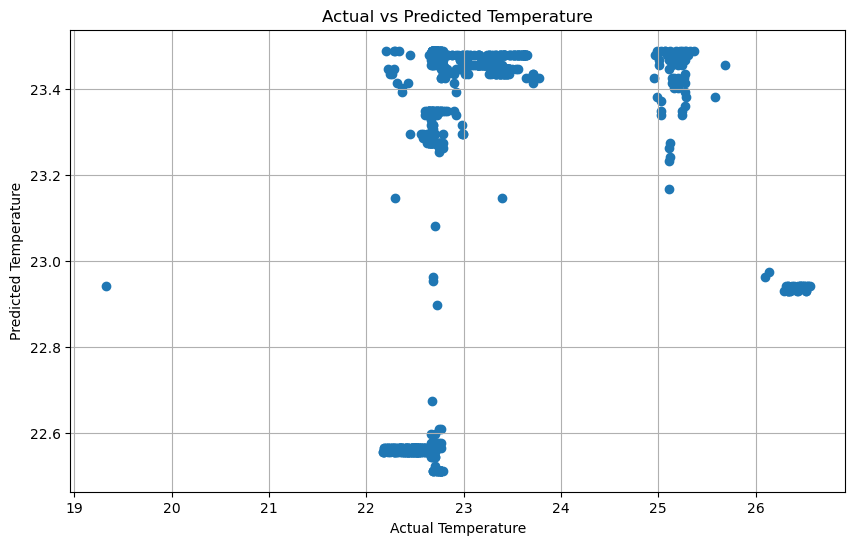

In [42]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()

In [45]:
coeff_LR =model.coef_
coeff_LR

array([-0.01073318])

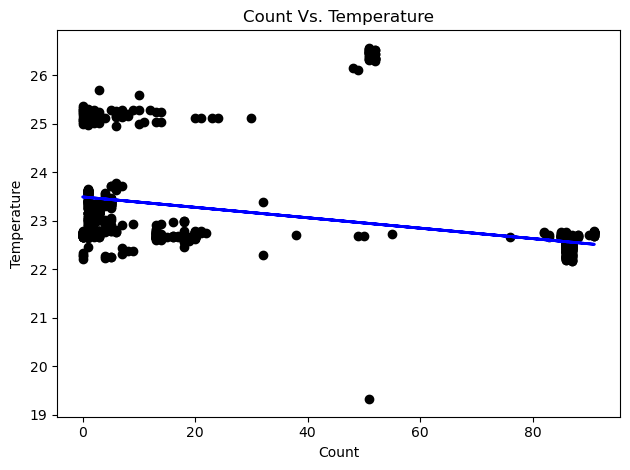

In [49]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.xlabel('Count')
plt.ylabel('Temperature')
plt.title('Count Vs. Temperature')
plt.tight_layout()
plt.show()